<a href="https://colab.research.google.com/github/MMoltira/DataMining/blob/master/Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #เอาข้อมูลเข้า
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/DWDM_material'

In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
avg_Income_1 = os.path.join(path,'avg_Income_1.csv')

In [ ]:
avg_Income_1 = pd.read_csv(avg_Income_1)
avg_Income_1

,จังหวัด,avg_income
0,กรุงเทพมหานคร 53,42380.0
1,สมุทรปราการ 53,23359.0
2,นนทบุรี 53,34626.0
3,ปทุมธานี 53,26686.0
4,พระนครศรีอยุธยา 53,25820.0
...,...,...
226,ตรัง 55,33269.9
227,พัทลุง 55,26169.3
228,ปัตตานี 55,20199.1
229,ยะลา 55,22483.1


In [ ]:
avg_Income_1.shape

(231, 2)

In [ ]:
avg_Income_1.isnull().any()

จังหวัด       False
avg_income     True
dtype: bool

In [ ]:
avg_Income_1[['avg_income']] = avg_Income_1[['avg_income']].fillna(0) 

In [ ]:
avg_Income_1.isnull().any()

จังหวัด       False
avg_income    False
dtype: bool

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Xi = avg_Income_1[['avg_income']] #Xi ตัวแปรของรายได้

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
Xi,y=make_blobs(n_samples=231, centers=3, n_features=2, random_state=6)

In [ ]:
Xi.shape 

(231, 2)

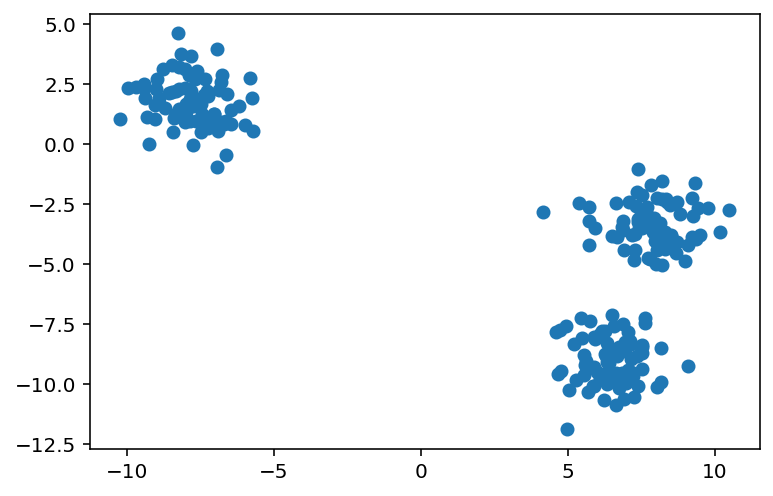

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Xi[:,0],Xi[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(Xi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(Xi) # predict ว่าอยู่ในกลุ่มไหน

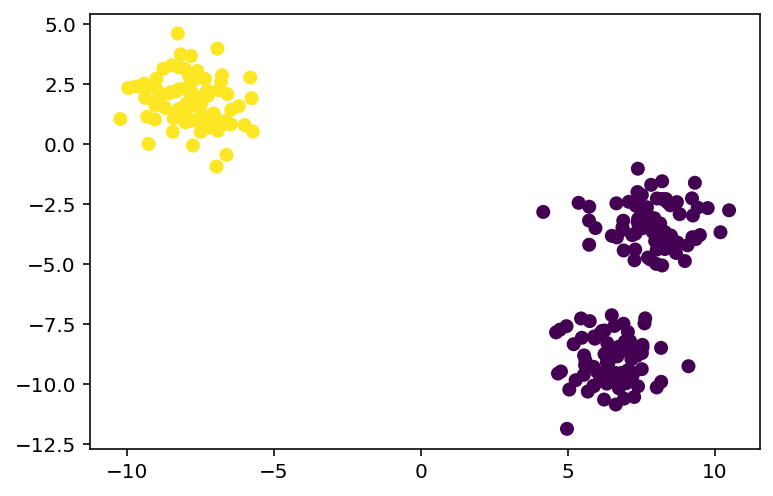

In [ ]:
plt.scatter(Xi[:,0], Xi[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
n_krachuki = 2 # จำนวนกระจุก
n_thamsami = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueaki = np.random.choice(len(Xi),n_krachuki,replace=0)
X_ceni = Xi[sumlueaki] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsami):
    raya2i = ((X_ceni[None]-Xi[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klumi = raya2i.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maii = np.empty_like(X_ceni) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachuki):
        if(len(Xi[klumi==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maii[j] = Xi[klumi==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maii[j] = Xi[np.random.randint(len(Xi))]
    if(np.allclose(X_ceni,X_cen_maii,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_ceni = X_cen_maii
        break
    X_ceni = X_cen_maii # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

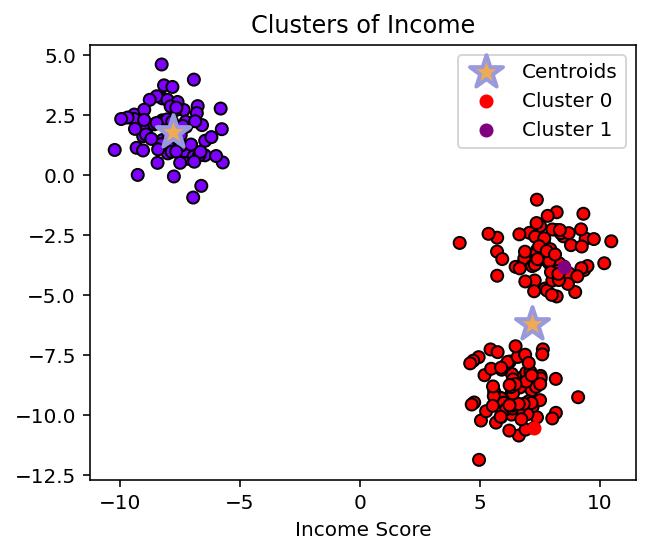

In [ ]:
raya2i = ((X_ceni[None]-Xi[:,None])**2).sum(2)
zi = raya2i.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xi[:,0],Xi[:,1],c=zi,edgecolor='k',cmap='rainbow')
plt.scatter(X_ceni[:,0],X_ceni[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xi[0,0], Xi[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xi[1,0], Xi[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Income')
plt.xlabel('Income Score')
plt.legend()
plt.show()

In [ ]:
ssei = 0
for i in range(n_krachuki):
    ssei += np.sum(raya2i[zi==i,i])
print(ssei)

1751.9669425508212


In [ ]:
KMclust.cluster_centers_

array([[ 7.17049205, -6.18852947],
       [-7.79775007,  1.78610777]])

In [ ]:
KMclust.transform(Xi) # the distance between each point and centroid

array([[ 4.35657384, 19.46286796],
       [ 2.71215952, 17.25282908],
       [ 2.70884496, 16.22743323],
       [ 5.05983897, 17.45766143],
       [ 2.02897205, 16.04954075],
       [ 2.56177615, 16.71518607],
       [15.64664579,  1.34745187],
       [ 3.4711508 , 18.87195087],
       [16.62190693,  1.50652845],
       [ 2.7266152 , 17.23167107],
       [16.6160869 ,  0.34904234],
       [ 4.03944671, 16.52353791],
       [ 3.85827321, 14.22449676],
       [17.02789616,  0.19453677],
       [ 3.61896268, 18.53323763],
       [17.58481661,  0.66590015],
       [ 2.30713982, 17.77093305],
       [17.02693124,  1.03696265],
       [17.19176311,  0.52754238],
       [15.33005926,  1.64582881],
       [15.60783922,  1.39409006],
       [ 2.91852292, 16.48022043],
       [ 3.12708999, 18.0930437 ],
       [ 2.26100905, 17.36691817],
       [15.76940085,  2.22813124],
       [ 2.44106119, 17.36937133],
       [ 4.77217036, 18.84251956],
       [ 3.43700643, 18.43292038],
       [ 2.62046403,

In [ ]:
KMclust.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
ssdi=[] #เซทว่างของรายได้
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xi) #Xi ตัวแปรของรายได้
    ssdi.append([k, m.inertia_])
ssdi

[[2, 1751.9669425508212],
 [3, 444.034965979045],
 [4, 380.2639248784881],
 [5, 327.11249208354513],
 [6, 274.75300198933974],
 [7, 241.48613095993358],
 [8, 210.30171116494697],
 [9, 186.93860401862088]]

In [ ]:
xyi=np.array(ssdi) #xyi ตัวแปร xy ของรายได้
print(xyi)

[[   2.         1751.96694255]
 [   3.          444.03496598]
 [   4.          380.26392488]
 [   5.          327.11249208]
 [   6.          274.75300199]
 [   7.          241.48613096]
 [   8.          210.30171116]
 [   9.          186.93860402]]


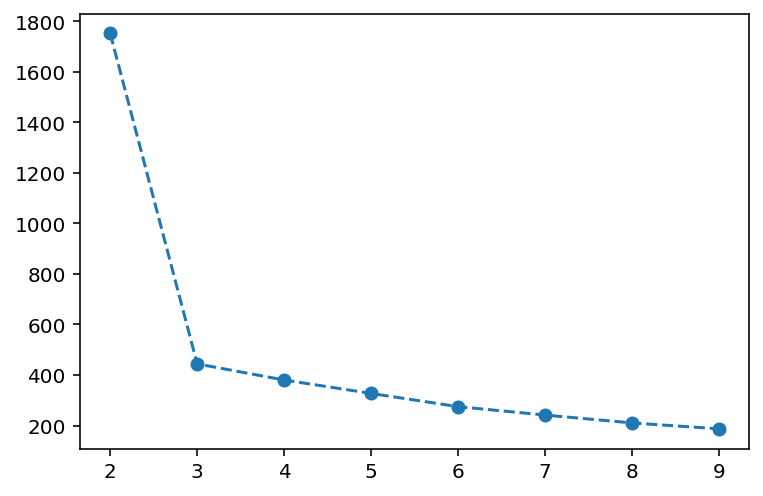

In [ ]:
plt.plot(xyi[:, 0], xyi[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [ ]:
ddi=pd.DataFrame(ssdi, columns=['k', 'ssdi']) 
ddi #ddi ตัวแปรของรายได้

,k,ssdi
0,2,1751.966943
1,3,444.034966
2,4,380.263925
3,5,327.112492
4,6,274.753002
5,7,241.486131
6,8,210.301711
7,9,186.938604


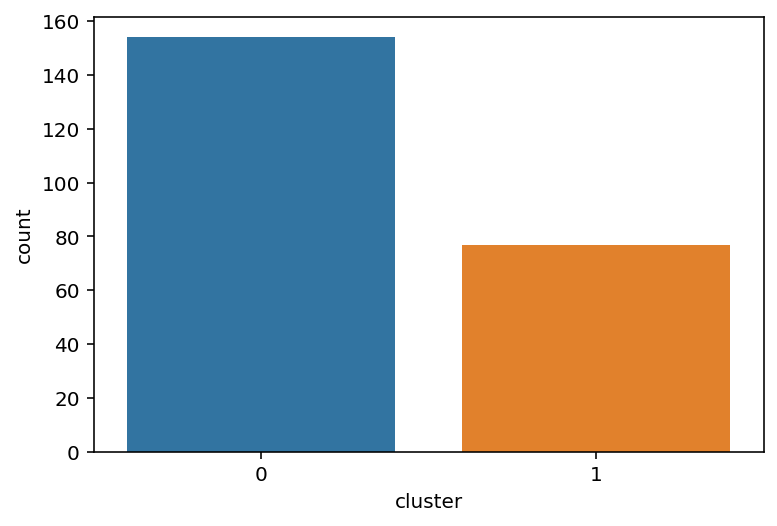

In [ ]:
sns.countplot(x='cluster', data=avg_Income_1)

In [ ]:
avg_Income_1.groupby('cluster').describe().T

cluster                      0             1
avg_income count    154.000000     77.000000
           mean   21081.611688  20199.318182
           std     6998.588556   6127.008737
           min        0.000000      0.000000
           25%    16704.700000  16249.300000
           50%    19881.650000  19417.800000
           75%    24943.050000  22504.500000
           max    49190.800000  36245.200000

In [ ]:
avg_Income_1

,จังหวัด,avg_income,cluster
0,กรุงเทพมหานคร 53,42380.0,0
1,สมุทรปราการ 53,23359.0,0
2,นนทบุรี 53,34626.0,0
3,ปทุมธานี 53,26686.0,0
4,พระนครศรีอยุธยา 53,25820.0,0
...,...,...,...
226,ตรัง 55,33269.9,1
227,พัทลุง 55,26169.3,0
228,ปัตตานี 55,20199.1,1
229,ยะลา 55,22483.1,1
